# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [48]:
# Memuat dataset
df = pd.read_csv("/content/stock_price.csv")

# Menampilkan beberapa baris pertama dari dataset
print(df.head())

# Memeriksa informasi umum tentang dataset
print(df.info())


       Date     Open     High      Low    Close    Volume  AdjustedClose
0  20151221  10875.0  11125.0  10875.0  11100.0  10989300       2165.829
1  20151222  11050.0  11100.0  10925.0  11050.0  14565500       2156.073
2  20151223  11050.0  11125.0  10975.0  11100.0   6534000       2165.829
3  20151228  11000.0  11450.0  10975.0  11400.0  20106600       2224.365
4  20151229  11350.0  11425.0  11325.0  11400.0  11757300       2224.365
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2182 non-null   int64  
 1   Open           2182 non-null   float64
 2   High           2182 non-null   float64
 3   Low            2182 non-null   float64
 4   Close          2182 non-null   float64
 5   Volume         2182 non-null   int64  
 6   AdjustedClose  2182 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 119.5 KB
None


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Mengonversi kolom Date ke format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Mengurutkan data berdasarkan tanggal
df = df.sort_values('Date')

In [51]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,Date,Open,High,Low,Close,Volume,AdjustedClose
count,2182,2182.000000,2182.000000,2182.000000,2182.000000,2.182000e+03,2182.000000
mean,1970-01-01 00:00:00.020200374,5973.796975,6036.881302,5910.742438,5972.981210,1.301309e+08,3831.752274
min,1970-01-01 00:00:00.020151221,2250.000000,2270.000000,2160.000000,2170.000000,6.357500e+06,1858.515000
25%,1970-01-01 00:00:00.020180321,3920.000000,3952.500000,3860.000000,3910.000000,6.377065e+07,2980.454000
50%,1970-01-01 00:00:00.020200623,4480.000000,4530.000000,4430.000000,4480.000000,1.096462e+08,3990.199000
75%,1970-01-01 00:00:00.020220919,5600.000000,5625.000000,5550.000000,5593.750000,1.672618e+08,4550.000000
max,1970-01-01 00:00:00.020241220,16450.000000,16825.000000,16425.000000,16450.000000,8.726073e+08,6400.000000
std,NaN,3495.832248,3528.425888,3473.961599,3503.874837,1.051673e+08,1024.551313


In [52]:
# Menggunakan harga penutupan sebagai target (y) dan fitur lainnya sebagai X
X = df[['Open', 'High', 'Low', 'Volume']]  # Fitur
y = df['Close']  # Target

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menstandarisasi data (fitur) agar model tidak terpengaruh oleh skala yang berbeda
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [53]:
# Melihat 5 baris pertama data
df.head()

# Menampilkan informasi dataset (tipe data, jumlah non-null, dll.)
df.info()

# Mengecek apakah ada nilai yang hilang
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2182 non-null   datetime64[ns]
 1   Open           2182 non-null   float64       
 2   High           2182 non-null   float64       
 3   Low            2182 non-null   float64       
 4   Close          2182 non-null   float64       
 5   Volume         2182 non-null   int64         
 6   AdjustedClose  2182 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 119.5 KB


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
AdjustedClose,0


In [54]:
df.describe()

,Date,Open,High,Low,Close,Volume,AdjustedClose
count,2182,2182.000000,2182.000000,2182.000000,2182.000000,2.182000e+03,2182.000000
mean,1970-01-01 00:00:00.020200374,5973.796975,6036.881302,5910.742438,5972.981210,1.301309e+08,3831.752274
min,1970-01-01 00:00:00.020151221,2250.000000,2270.000000,2160.000000,2170.000000,6.357500e+06,1858.515000
25%,1970-01-01 00:00:00.020180321,3920.000000,3952.500000,3860.000000,3910.000000,6.377065e+07,2980.454000
50%,1970-01-01 00:00:00.020200623,4480.000000,4530.000000,4430.000000,4480.000000,1.096462e+08,3990.199000
75%,1970-01-01 00:00:00.020220919,5600.000000,5625.000000,5550.000000,5593.750000,1.672618e+08,4550.000000
max,1970-01-01 00:00:00.020241220,16450.000000,16825.000000,16425.000000,16450.000000,8.726073e+08,6400.000000
std,NaN,3495.832248,3528.425888,3473.961599,3503.874837,1.051673e+08,1024.551313


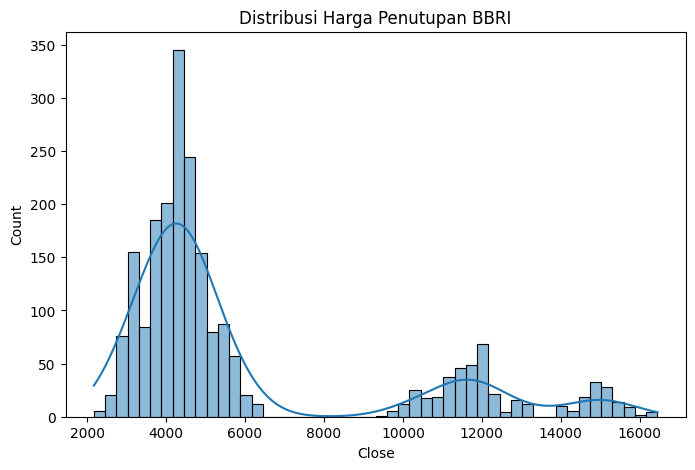

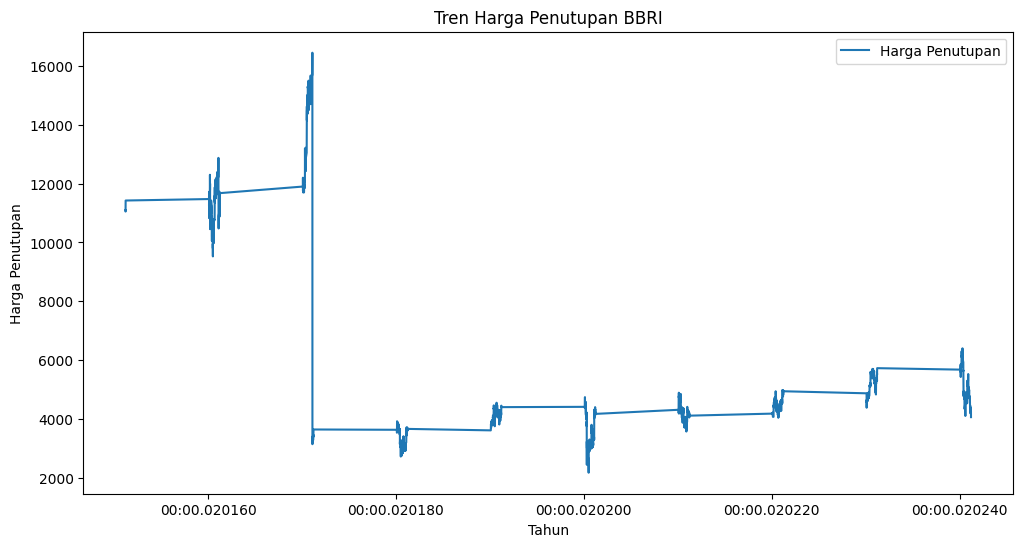

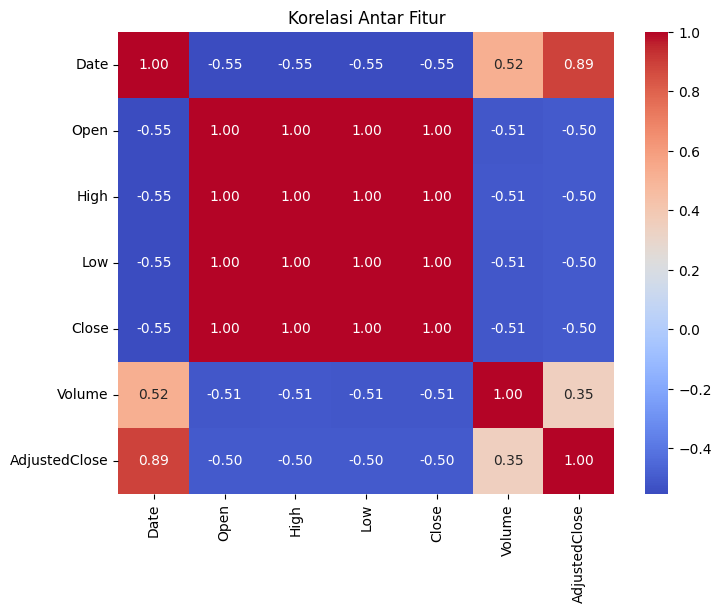

In [55]:
# Visualisasi harga penutupan
# Histogram distribusi harga saham
plt.figure(figsize=(8,5))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribusi Harga Penutupan BBRI')
plt.show()

# Line plot untuk melihat tren harga saham
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Harga Penutupan')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.title('Tren Harga Penutupan BBRI')
plt.legend()
plt.show()

# Heatmap korelasi antar fitur
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [56]:
#Fitur Numerik

X = df[['Open', 'High', 'Low', 'Close', 'Volume']]

#Persentase harga saham
df['Return'] = df['Close'].pct_change()  # Persentase perubahan harga harian
df.dropna(inplace=True)  # Hapus baris pertama yang NaN akibat pct_change()
X = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]


In [57]:
#Data hilang

X = X.dropna()  # Hapus baris dengan nilai kosong
# Atau bisa juga diisi dengan median
# X.fillna(X.median(), inplace=True)


In [58]:
#Standarisasi Data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [59]:
#Pemeriksaan ulang

print("Data setelah preprocessing:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())


Data setelah preprocessing:
       Open      High       Low     Close    Volume    Return
0  1.453371  1.436298  1.444715  1.450356 -1.099715 -0.176768
1  1.453371  1.443386  1.459115  1.464633 -1.176106  0.169683
2  1.439062  1.535539  1.459115  1.550294 -1.047011  1.033074
3  1.539226  1.528451  1.559911  1.550294 -1.126425 -0.003934
4  1.567845  1.556805  1.588710  1.557433 -0.986502  0.080210


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

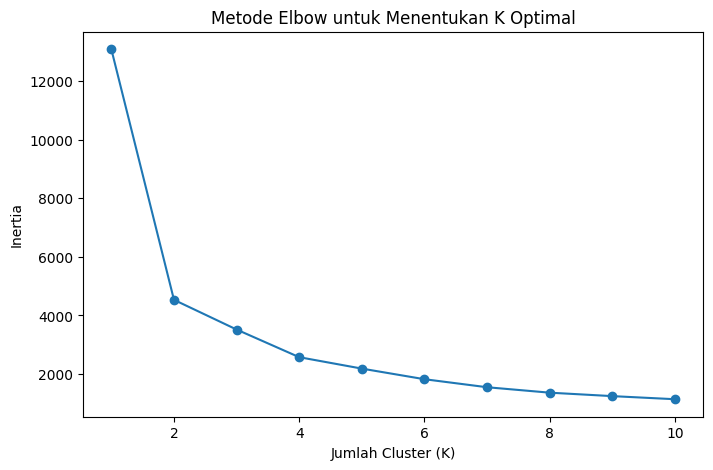

In [60]:
# Menentukan jumlah cluster optimal dengan metode Elbow
inertia = []
K_range = range(1, 11)  # Mencoba K dari 1 hingga 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot hasil Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

In [61]:
optimal_K = 2
kmeans = KMeans(n_clusters=optimal_K, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df.groupby('Cluster').mean()

,Date,Open,High,Low,Close,Volume,AdjustedClose,Return
Cluster,,,,,,,,
0,1970-01-01 00:00:00.020165025,12461.787281,12588.212719,12352.357456,12474.177632,2.309811e+07,2433.958254,0.000990
1,1970-01-01 00:00:00.020209746,4255.869565,4302.101449,4205.037681,4251.431884,1.584938e+08,4202.221837,-0.000132


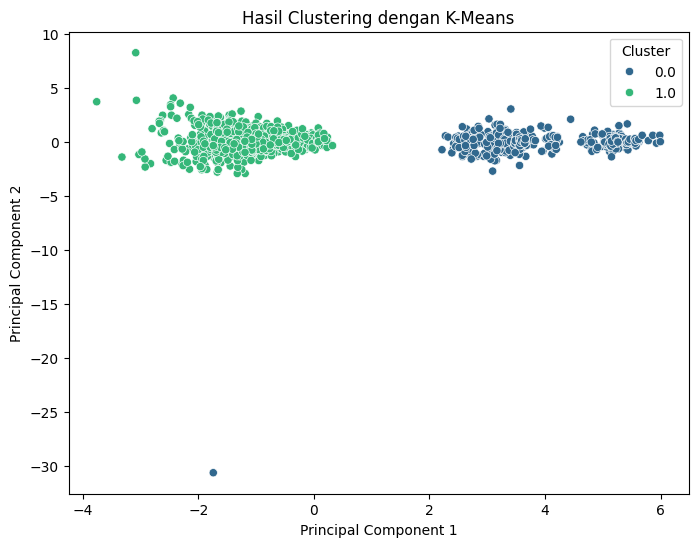

In [62]:
# Mereduksi data ke 2 dimensi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Menyusun hasil PCA dalam DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Plot hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hasil Clustering dengan K-Means')
plt.legend(title='Cluster')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [63]:
#Shilouette_score

sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.7013


In [64]:
#Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {db_score:.4f}")

Davies-Bouldin Index: 0.4323


In [65]:
#Evaluasi distribusi

print(df['Cluster'].value_counts())

Cluster
1    1725
0     456
Name: count, dtype: int64


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [66]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

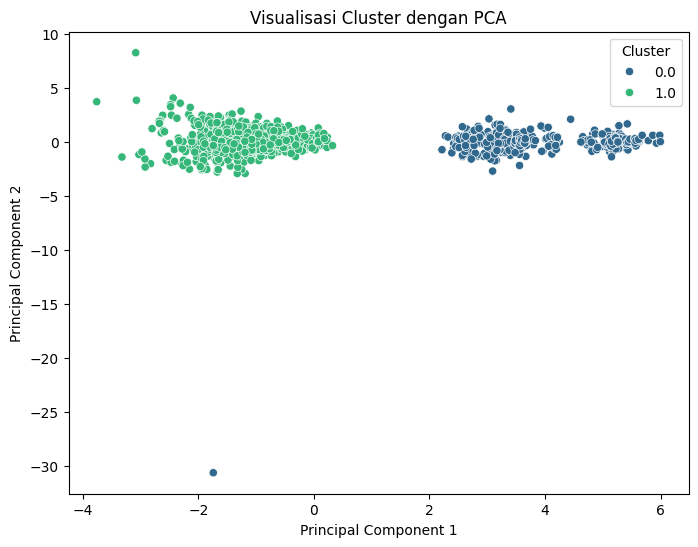

In [67]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi Cluster dengan PCA')
plt.legend(title='Cluster')
plt.show()


In [68]:
# Pastikan dataset asli dan hasil clustering tersedia
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Buat DataFrame dari data yang telah distandarisasi
df_scaled['Cluster'] = kmeans.labels_  # Tambahkan hasil clustering

# Inverse transform untuk mengembalikan ke skala aslinya
X_original = scaler.inverse_transform(df_scaled.drop(columns=['Cluster']))
df_original = pd.DataFrame(X_original, columns=X.columns)
df_original['Cluster'] = df_scaled['Cluster']  # Tambahkan cluster kembali

# Buat df_final sebagai hasil akhir
df_final = df.copy()  # Buat salinan dataset asli
df_final[X.columns] = df_original[X.columns]  # Gunakan data yang sudah dikembalikan ke skala asli
df_final['Cluster'] = df_original['Cluster']  # Tambahkan hasil clustering

print(df_final.head())  # Cek apakah df_final sudah ada


                           Date     Open     High      Low    Close  \
1 1970-01-01 00:00:00.020151222  11050.0  11125.0  10975.0  11100.0   
2 1970-01-01 00:00:00.020151223  11000.0  11450.0  10975.0  11400.0   
3 1970-01-01 00:00:00.020151228  11350.0  11425.0  11325.0  11400.0   
4 1970-01-01 00:00:00.020151229  11450.0  11525.0  11425.0  11425.0   
5 1970-01-01 00:00:00.020151230  11400.0  11600.0  11200.0  11475.0   

       Volume  AdjustedClose        Return  Cluster  
1   6534000.0       2156.073  4.524887e-03      0.0  
2  20106600.0       2165.829  2.702703e-02      0.0  
3  11757300.0       2224.365 -1.355253e-20      0.0  
4  26468300.0       2224.365  2.192982e-03      0.0  
5  20075800.0       2229.243  4.376368e-03      0.0  


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [72]:
# Melihat jumlah data dalam setiap cluster
cluster_counts = df_final['Cluster'].value_counts().sort_index()
print("Jumlah data dalam setiap cluster:\n", cluster_counts)


Jumlah data dalam setiap cluster:
 Cluster
0.0     455
1.0    1725
Name: count, dtype: int64


In [73]:
#Statistik rata-rata tiap fitur berdasarkan cluster
cluster_summary = df_final.groupby('Cluster').mean()
print("Statistik Rata-Rata Setiap Cluster:\n", cluster_summary)


Statistik Rata-Rata Setiap Cluster:
                                  Date          Open          High  \
Cluster                                                             
0.0     1970-01-01 00:00:00.020165011  12464.890110  12591.483516   
1.0     1970-01-01 00:00:00.020209706   4255.869565   4302.101449   

                  Low         Close        Volume  AdjustedClose    Return  
Cluster                                                                     
0.0      12355.494505  12477.307692  2.311687e+07    2432.253284  0.001003  
1.0       4205.037681   4251.431884  1.584938e+08    4201.728921 -0.000132  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [74]:
# Definisikan label cluster berdasarkan analisis
cluster_labels = {
    0: "Saham Stabil",
    1: "Saham Aktif",
}

# Tambahkan label ke dataset
df_final['Cluster_Label'] = df_final['Cluster'].map(cluster_labels)

# Menampilkan hasil
print(df_final[['Cluster', 'Cluster_Label']].head())


   Cluster Cluster_Label
1      0.0  Saham Stabil
2      0.0  Saham Stabil
3      0.0  Saham Stabil
4      0.0  Saham Stabil
5      0.0  Saham Stabil


Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

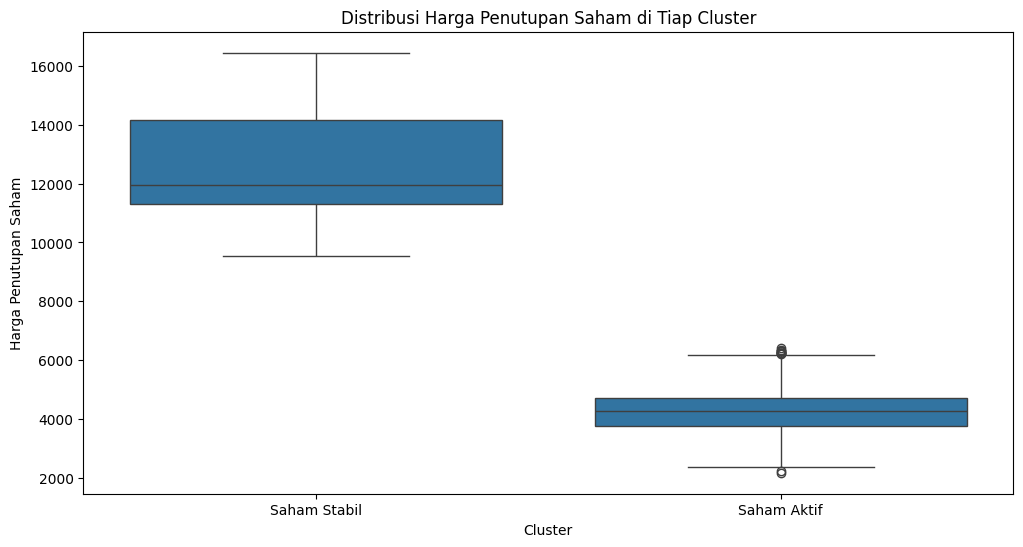

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_final['Cluster_Label'], y=df_final['Close'])
plt.xlabel("Cluster")
plt.ylabel("Harga Penutupan Saham")
plt.title("Distribusi Harga Penutupan Saham di Tiap Cluster")
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 1:
* **Harga penutupan**: Memiliki nilai yang lebih tinggi dan relatif stabil.
* **Rentang harga**  : 10.000 - 16.000, median 12.000.
* **Analisis**       : Saham dalam cluster ini cenderung memiliki harga tinggi dan lebih stabil, cocok untuk investor jangka panjang yang mencari keamanan dan return yang lebih konsisten.

2. Cluster 2:
* **Harga penutupan**:  lebih rendah dibandingkan Cluster 1.
* **Rentang harga**  :  2.000 - 6.000, beberapa outlier > 6.000
* **Analisis**       : nSaham dalam cluster ini lebih fluktuatif dan aktif diperdagangkan, cocok untuk trader jangka pendek yang ingin mengambil keuntungan dari pergerakan harga yang lebih cepat.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [77]:
df.to_csv('hasil_clustering.csv', index=False)

from google.colab import files
files.download('hasil_clustering.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>